In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from io import StringIO
import pydotplus
from IPython.display import Image
import scipy.stats as stats

#### COVID-19 vs Public Mental Health

In [2]:
#df = pd.DataFrame(pd.read_excel("./Data/Mental_health/Test.xlsx"))
depression_during_covid = pd.read_csv("./Data/Mental_health/countrywise_depression.csv")
depression_during_covid.head()

,country,prevalence,cases,pop2022
0,Ukraine,6.3,2800587,43192.122
1,Estonia,5.9,75667,1321.910
2,Australia,5.9,1318599,26068.792
3,United States,5.9,17491047,334805.269
4,Brazil,5.8,11548577,215353.593


In [3]:
depression_during_covid.describe()

,prevalence,cases,pop2022
count,179.000000,1.790000e+02,1.790000e+02
mean,4.440223,1.706975e+06,4.403255e+04
std,0.681251,6.131891e+06,1.556037e+05
min,2.900000,3.182000e+03,9.942600e+01
25%,4.000000,1.137420e+05,2.919170e+03
50%,4.400000,4.193020e+05,1.014057e+04
75%,5.000000,1.125315e+06,3.313527e+04
max,6.300000,5.667597e+07,1.448471e+06


In [4]:
depression_during_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     179 non-null    object 
 1   prevalence  179 non-null    float64
 2   cases       179 non-null    int64  
 3   pop2022     179 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.7+ KB


In [5]:
print(depression_during_covid.isnull().sum())

country       0
prevalence    0
cases         0
pop2022       0
dtype: int64


In [6]:
depression_before_covid = pd.read_csv("./Data/Mental_health/countrywse_depression_before_covid.csv")
depression_before_covid.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,5.125291
1,Afghanistan,AFG,1991,5.116306
2,Afghanistan,AFG,1992,5.106558
3,Afghanistan,AFG,1993,5.100328
4,Afghanistan,AFG,1994,5.099424


In [7]:
depression_before_covid.drop("Code", axis=1, inplace=True)

In [8]:
depression_before_covid.head()

,Entity,Year,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,1990,5.125291
1,Afghanistan,1991,5.116306
2,Afghanistan,1992,5.106558
3,Afghanistan,1993,5.100328
4,Afghanistan,1994,5.099424


In [9]:
depression_before_covid.describe()

,Year,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
count,8040.00000,8040.000000
mean,2004.50000,3.958323
std,8.65598,0.885276
min,1990.00000,1.640902
25%,1997.00000,3.283934
50%,2004.50000,3.927947
75%,2012.00000,4.539022
max,2019.00000,7.688213


In [10]:
depression_before_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 3 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Entity                                                                           8040 non-null   object 
 1   Year                                                                             8040 non-null   int64  
 2   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  8040 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 188.6+ KB


In [11]:
print(depression_before_covid.isnull().sum())

Entity                                                                             0
Year                                                                               0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)    0
dtype: int64


#### Create different dataframes per year before covid

In [12]:
depression_before_covid_15 = pd.DataFrame(columns = ['Entity', 'Year', 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'])
depression_before_covid_16 = pd.DataFrame(columns = ['Entity', 'Year', 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'])
depression_before_covid_17 = pd.DataFrame(columns = ['Entity', 'Year', 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'])
depression_before_covid_18 = pd.DataFrame(columns = ['Entity', 'Year', 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'])
depression_before_covid_19 = pd.DataFrame(columns = ['Entity', 'Year', 'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'])

In [13]:
for index, row in depression_before_covid.iterrows():
    if(row['Year'] == 2015):
        depression_before_covid_15.loc[len(depression_before_covid_15.index)] = row
    elif(row['Year'] == 2016):
        depression_before_covid_16.loc[len(depression_before_covid_16.index)] = row
    elif(row['Year'] == 2017):
        depression_before_covid_17.loc[len(depression_before_covid_17.index)] = row
    elif(row['Year'] == 2018):
        depression_before_covid_18.loc[len(depression_before_covid_18.index)] = row
    elif(row['Year'] == 2019):
        depression_before_covid_19.loc[len(depression_before_covid_19.index)] = row

In [14]:
depression_before_covid_15.drop("Year", axis=1, inplace=True)
depression_before_covid_16.drop("Year", axis=1, inplace=True)
depression_before_covid_17.drop("Year", axis=1, inplace=True)
depression_before_covid_18.drop("Year", axis=1, inplace=True)
depression_before_covid_19.drop("Year", axis=1, inplace=True)

#### Percent Prevalence of Depression across the world from 2015 to 2020

In [15]:
mean_15 = depression_before_covid_15["Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)"].mean()
mean_16 = depression_before_covid_16["Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)"].mean()
mean_17 = depression_before_covid_17["Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)"].mean()
mean_18 = depression_before_covid_18["Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)"].mean()
mean_19 = depression_before_covid_19["Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)"].mean()

before_covid = [mean_15, mean_16, mean_17, mean_18, mean_19]

during_covid = depression_during_covid["prevalence"].mean()

In [16]:
before_covid

[3.9022929199915803,
 3.9015204585242067,
 3.901461113356287,
 3.9055171325891886,
 3.9126968939338647]

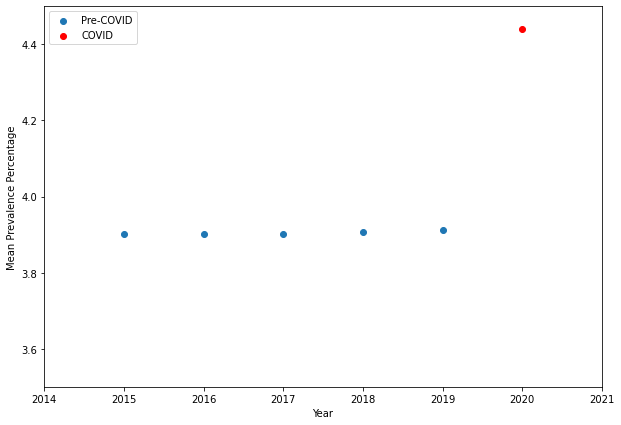

In [17]:
fig = plt.figure(figsize=(10,7))
ax1 = plt.scatter(x=[2015,2016,2017,2018,2019],y=before_covid)
ax2 = plt.scatter(x=[2020],y=during_covid,c='red')

plt.xlabel('Year')
plt.ylabel('Mean Prevalence Percentage')
plt.legend([ax1, ax2],['Pre-COVID','COVID'])
plt.xlim([2014,2021])
plt.ylim([3.5,4.5])
plt.show()

fig.savefig('./Figures/MINE/depression_general.png')

#### CONCLUSION: Mean Prevalence Percentage highest during COVID-19.

#### Histogram for depression data distribution before and after covid

In [18]:
depression_before_covid_15.head()

,Entity,Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,5.113303
1,Africa,4.540591
2,African Region,4.561188
3,African Union,4.540591
4,Albania,2.610017


In [19]:
depression_during_covid.head()

,country,prevalence,cases,pop2022
0,Ukraine,6.3,2800587,43192.122
1,Estonia,5.9,75667,1321.910
2,Australia,5.9,1318599,26068.792
3,United States,5.9,17491047,334805.269
4,Brazil,5.8,11548577,215353.593


In [20]:
before_rate = []
during_rate = []
common_countries = []

countries = depression_during_covid['country']

for c in countries:
    if(c in depression_before_covid_15['Entity'].values):
        mean_val = (depression_before_covid_15[depression_before_covid_15['Entity']==c]['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'].item() + 
                    depression_before_covid_15[depression_before_covid_16['Entity']==c]['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'].item() + 
                    depression_before_covid_15[depression_before_covid_17['Entity']==c]['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'].item() +
                    depression_before_covid_15[depression_before_covid_18['Entity']==c]['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'].item() +
                    depression_before_covid_15[depression_before_covid_19['Entity']==c]['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'].item())/5
                    
        before_rate.append(mean_val)
        during_rate.append(depression_during_covid[depression_during_covid['country']==c]['prevalence'].item())
        common_countries.append(c)

comp_depr_dict = {'Country':common_countries,
                   'Before covid rate':before_rate,
                   'During covid rate': during_rate}

comp_depr = pd.DataFrame.from_dict(comp_depr_dict)
comp_depr.head()

,Country,Before covid rate,During covid rate
0,Ukraine,4.184656,6.3
1,Estonia,3.983596,5.9
2,Australia,4.947175,5.9
3,United States,4.751602,5.9
4,Brazil,4.032894,5.8


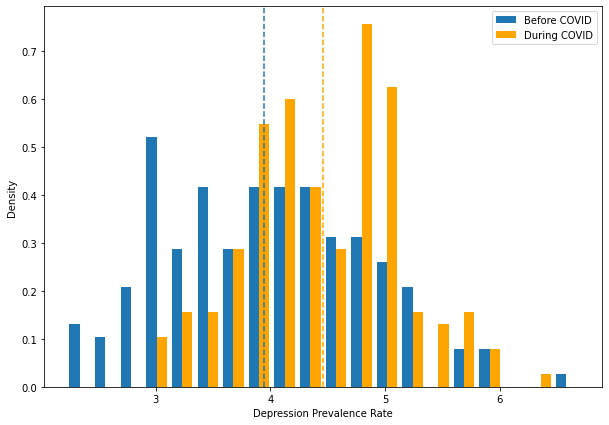

In [21]:
fig = plt.figure(figsize=(10,7))
before_covid= comp_depr['Before covid rate']
during_covid= comp_depr['During covid rate']
plt.hist([before_covid, during_covid], bins=20 ,color=["#1f77b4","orange"],label=['Before COVID', 'During COVID'],density=True)
plt.axvline(before_covid.mean(), color="#1f77b4",linestyle='--')
plt.axvline(during_covid.mean(), color="orange",linestyle='--')
plt.legend(loc='upper right')
plt.xlabel('Depression Prevalence Rate')
plt.ylabel('Density')
plt.show()

fig.savefig('./Figures/MINE/depression_compare_histogram.png')

#### Trend in the US

Tableau plots

#### Unemployment

Unemployment vs mental illness - tableau (side by side chart)

In [22]:
unemployment_during_covid = pd.read_csv("./Data/Mental_health/countrywise_unemployment.csv")
unemployment_during_covid.head()

,country,rateWb,yearWb,rateIlo,yearIlo,rateCia,yearCia
0,South Africa,29.2,2020,29.2,2020.0,28.53,2019.0
1,Djibouti,26.1,2017,26.1,2017.0,40.00,2017.0
2,Equatorial Guinea,25.0,1983,NaN,NaN,8.60,2014.0
3,Botswana,24.9,2020,22.6,2019.0,20.00,2013.0
4,Grenada,22.9,2015,22.9,2015.0,24.00,2017.0


In [23]:
depression_during_covid.head()

,country,prevalence,cases,pop2022
0,Ukraine,6.3,2800587,43192.122
1,Estonia,5.9,75667,1321.910
2,Australia,5.9,1318599,26068.792
3,United States,5.9,17491047,334805.269
4,Brazil,5.8,11548577,215353.593


Create a dataframe containing countrywise unemployment and depression prevalence rate

In [24]:
unemp_rate = []
dep_rate = []
common_countries = []

countries = depression_during_covid['country']

for c in countries:
    if(c in unemployment_during_covid['country'].values):
        unemp_rate.append(unemployment_during_covid[unemployment_during_covid['country']==c]['rateWb'].item())
        dep_rate.append(depression_during_covid[depression_during_covid['country']==c]['prevalence'].item())
        common_countries.append(c)

unemp_depr_dict = {'Country':common_countries,
                   'Unemployment rate':unemp_rate,
                   'Prevalence rate': dep_rate}

unemp_depr = pd.DataFrame.from_dict(unemp_depr_dict)
unemp_depr.head()

,Country,Unemployment rate,Prevalence rate
0,Ukraine,9.5,6.3
1,Estonia,6.8,5.9
2,Australia,6.5,5.9
3,United States,8.1,5.9
4,Brazil,13.7,5.8


In [25]:
print(unemp_depr.isnull().sum())

Country              0
Unemployment rate    4
Prevalence rate      0
dtype: int64


In [26]:
unemp_depr = unemp_depr.dropna()
print(unemp_depr.isnull().sum())

Country              0
Unemployment rate    0
Prevalence rate      0
dtype: int64


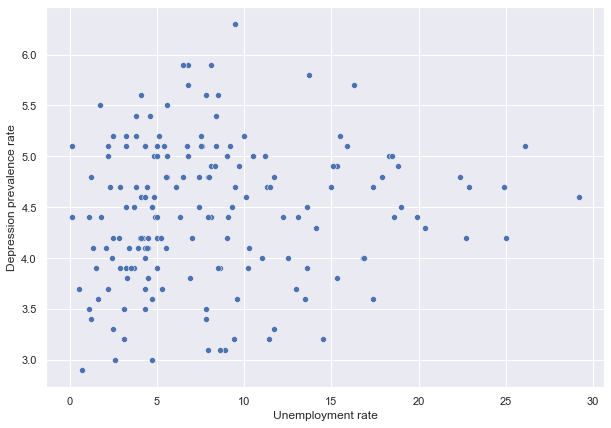

In [27]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.scatterplot(x=unemp_depr['Unemployment rate'],y=unemp_depr['Prevalence rate'])
plt.xlabel('Unemployment rate')
plt.ylabel('Depression prevalence rate')
ax.figure.savefig("./Figures/MINE/unemployment_depression.png")

In [28]:
r,p = scipy.stats.pearsonr(unemp_depr['Unemployment rate'], unemp_depr['Prevalence rate'])
print(r,p)

0.11520064714197709 0.1323651867885431


Positive weak correlation (since r value is between 0 and 0.3) and it is statistically insignificant (p value > 0.05)

Unemployment vs Depression across US in specific

In [29]:
unemployment_US = pd.read_csv("./Data/Mental_health/Geographical/US_statewise_unemployment.csv")
unemployment_US.head()

,State,unemploymentRate
0,Michigan,0.057
1,Virginia,0.050
2,Kansas,0.049
3,New Hampshire,0.047
4,Alabama,0.046


In [30]:
depression_US = pd.read_csv("./Data/Mental_health/Geographical/US_statewise_depression.csv")
depression_US.head()

,State,rateMajorDepression
0,Utah,0.06
1,Rhode Island,0.06
2,Minnesota,0.06
3,Maine,0.06
4,West Virginia,0.05


In [31]:
unemp_rate = []
dep_rate = []
common_states = []

states = depression_US['State']

for s in states:
    if(s in unemployment_US['State'].values):
        unemp_rate.append(unemployment_US[unemployment_US['State']==s]['unemploymentRate'].item())
        dep_rate.append(depression_US[depression_US['State']==s]['rateMajorDepression'].item())
        common_states.append(s)

unemp_depr_dict = {'State':common_states,
                   'Unemployment rate':unemp_rate,
                   'Depression rate': dep_rate}

unemp_depr = pd.DataFrame.from_dict(unemp_depr_dict)
unemp_depr.head()

,State,Unemployment rate,Depression rate
0,Utah,0.026,0.06
1,Rhode Island,0.032,0.06
2,Minnesota,0.033,0.06
3,Maine,0.028,0.06
4,West Virginia,0.037,0.05


In [32]:
print(unemp_depr.isnull().sum())

State                0
Unemployment rate    2
Depression rate      1
dtype: int64


In [33]:
unemp_depr = unemp_depr.dropna()
print(unemp_depr.isnull().sum())

State                0
Unemployment rate    0
Depression rate      0
dtype: int64


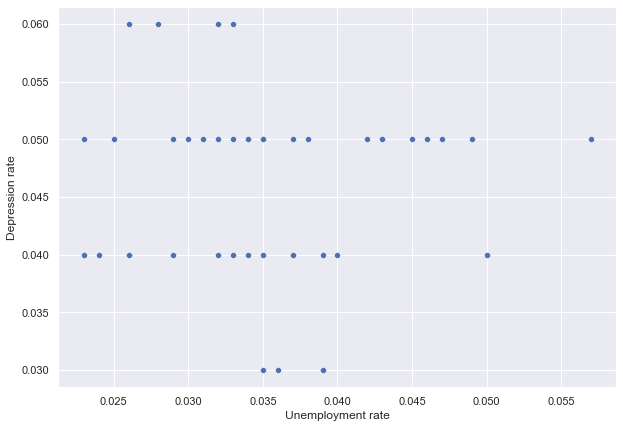

In [34]:
ax = sns.scatterplot(x=unemp_depr['Unemployment rate'],y=unemp_depr['Depression rate'])
plt.xlabel('Unemployment rate')
plt.ylabel('Depression rate')
ax.figure.savefig("./Figures/MINE/unemployment_depression_US.png")

In [35]:
r,p = scipy.stats.pearsonr(unemp_depr['Unemployment rate'], unemp_depr['Depression rate'])
print(r,p)

0.008438067131744893 0.9551094240575221


Positive weak correlation (since r value is between 0 and 0.3) and it is statistically insignificant (p value > 0.05)

#### Gender-wise mental health effect

Tableau Plots

#### Young Adults

Data - Survey results from India

In [36]:
young_adults = pd.read_csv("./Data/Mental_health/Young_adults/Survey_India.csv")
young_adults.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


Metadata:

- Region - Delhi/Outside
- Age - 7 to 59
- Time spent on online class
- Rating - 'Good', 'Excellent', 'Very poor', 'Average', 'Poor'
- Time spent on fitness
- Time spent on sleep
- Time spent on social media
- Change in weight - 'Increased', 'Decreased', 'Remain Constant'
- Health issue during lockdown - yes/no

#### Data Wrangling

Eliminating the irrelevant columns

In [37]:
young_adults.drop("Medium for online class", axis=1, inplace=True)
young_adults.drop("Time spent on self study", axis=1, inplace=True)
young_adults.drop("Prefered social media platform", axis=1, inplace=True)
young_adults.drop("Time spent on TV", axis=1, inplace=True)
young_adults.drop("Number of meals per day", axis=1, inplace=True)
young_adults.drop("Stress busters", axis=1, inplace=True)
young_adults.drop("Time utilized", axis=1, inplace=True)
young_adults.drop("Do you find yourself more connected with your family, close friends , relatives  ?", axis=1, inplace=True)
young_adults.drop("What you miss the most", axis=1, inplace=True)

In [38]:
young_adults.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Time spent on fitness,Time spent on sleep,Time spent on social media,Change in your weight,Health issue during lockdown
0,R1,Delhi-NCR,21,2.0,Good,0.0,7.0,3.0,Increased,NO
1,R2,Delhi-NCR,21,0.0,Excellent,2.0,10.0,3.0,Decreased,NO
2,R3,Delhi-NCR,20,7.0,Very poor,0.0,6.0,2.0,Remain Constant,NO
3,R4,Delhi-NCR,20,3.0,Very poor,1.0,6.0,5.0,Decreased,NO
4,R5,Delhi-NCR,21,3.0,Good,1.0,8.0,3.0,Remain Constant,NO


Considering only age group 21-30

In [39]:
young_adults.drop(young_adults[young_adults['Age of Subject'] > 30].index, inplace = True)
young_adults.drop(young_adults[young_adults['Age of Subject'] < 21].index, inplace = True)

In [40]:
print(young_adults.isnull().sum())

ID                                    0
Region of residence                   0
Age of Subject                        0
Time spent on Online Class            0
Rating of Online Class experience    13
Time spent on fitness                 0
Time spent on sleep                   0
Time spent on social media            0
Change in your weight                 0
Health issue during lockdown          0
dtype: int64


Removing NA rows

In [41]:
young_adults = young_adults.dropna()
print(young_adults.isnull().sum())

ID                                   0
Region of residence                  0
Age of Subject                       0
Time spent on Online Class           0
Rating of Online Class experience    0
Time spent on fitness                0
Time spent on sleep                  0
Time spent on social media           0
Change in your weight                0
Health issue during lockdown         0
dtype: int64


In [42]:
young_adults.to_csv("./Data/Mental_health/Young_adults/cleaned_survey.csv")

Effect of time spent on online class on sleep

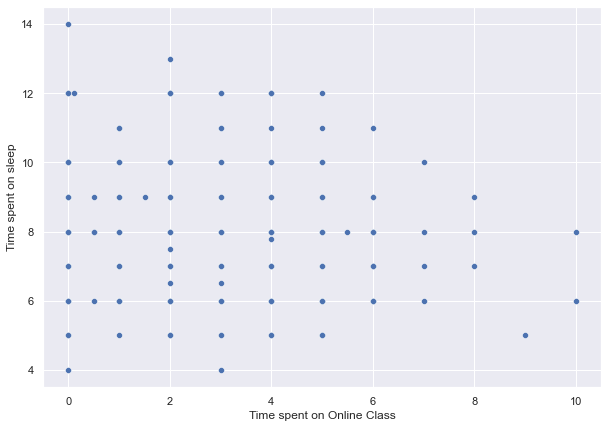

In [43]:
ax = sns.scatterplot(x=young_adults['Time spent on Online Class'],y=young_adults['Time spent on sleep'])
plt.xlabel('Time spent on Online Class')
plt.ylabel('Time spent on sleep')
ax.figure.savefig("./Figures/MINE/young_online_sleep.png")

In [44]:
r,p = scipy.stats.pearsonr(young_adults['Time spent on Online Class'], young_adults['Time spent on sleep'])
print(r,p)

-0.12153370911865041 0.01718905280103167


Effect of time spent on online class on fitness

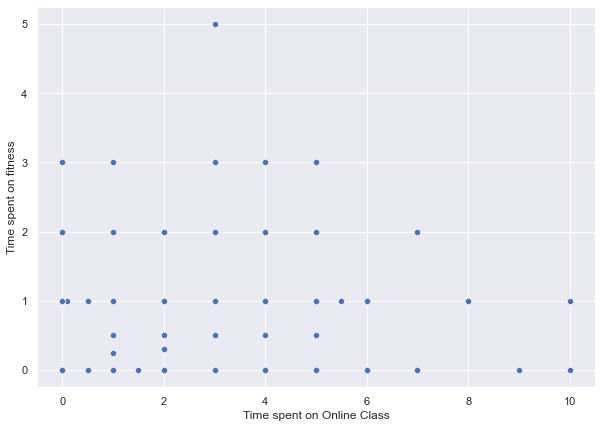

In [45]:
ax = sns.scatterplot(x=young_adults['Time spent on Online Class'],y=young_adults['Time spent on fitness'])
plt.xlabel('Time spent on Online Class')
plt.ylabel('Time spent on fitness')
ax.figure.savefig("./Figures/MINE/young_online_vs_fitness.png")

In [46]:
r,p = scipy.stats.pearsonr(young_adults['Time spent on Online Class'], young_adults['Time spent on fitness'])
print(r,p)

0.06224293131825665 0.2236379893528859


#### Decision Tree Classifier

In [47]:
young_adults.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Time spent on fitness,Time spent on sleep,Time spent on social media,Change in your weight,Health issue during lockdown
0,R1,Delhi-NCR,21,2.0,Good,0.0,7.0,3.0,Increased,NO
1,R2,Delhi-NCR,21,0.0,Excellent,2.0,10.0,3.0,Decreased,NO
4,R5,Delhi-NCR,21,3.0,Good,1.0,8.0,3.0,Remain Constant,NO
5,R6,Delhi-NCR,21,0.0,Very poor,0.0,5.0,1.0,Decreased,YES
8,R9,Delhi-NCR,21,3.0,Very poor,1.0,8.0,2.0,Increased,NO


In [48]:
young_adults['Rating of Online Class experience'] = young_adults['Rating of Online Class experience'].replace({'Excellent':0, 'Good':1, 'Average':2, 'Poor':3, 'Very poor':4})
young_adults['Change in your weight'] = young_adults['Change in your weight'].replace({'Increased':0, 'Decreased':1, 'Remain Constant':2})
young_adults['Health issue during lockdown'] = young_adults['Health issue during lockdown'].replace({'YES':0, 'NO':1})
young_adults.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Time spent on fitness,Time spent on sleep,Time spent on social media,Change in your weight,Health issue during lockdown
0,R1,Delhi-NCR,21,2.0,1,0.0,7.0,3.0,0,1
1,R2,Delhi-NCR,21,0.0,0,2.0,10.0,3.0,1,1
4,R5,Delhi-NCR,21,3.0,1,1.0,8.0,3.0,2,1
5,R6,Delhi-NCR,21,0.0,4,0.0,5.0,1.0,1,0
8,R9,Delhi-NCR,21,3.0,4,1.0,8.0,2.0,0,1


In [49]:
list_features = ['Age of Subject', 'Time spent on Online Class', 'Rating of Online Class experience', 'Time spent on fitness', 'Time spent on sleep', 'Time spent on social media', 'Change in your weight']
x = young_adults[list_features]
y = young_adults['Health issue during lockdown']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [50]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list_features, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

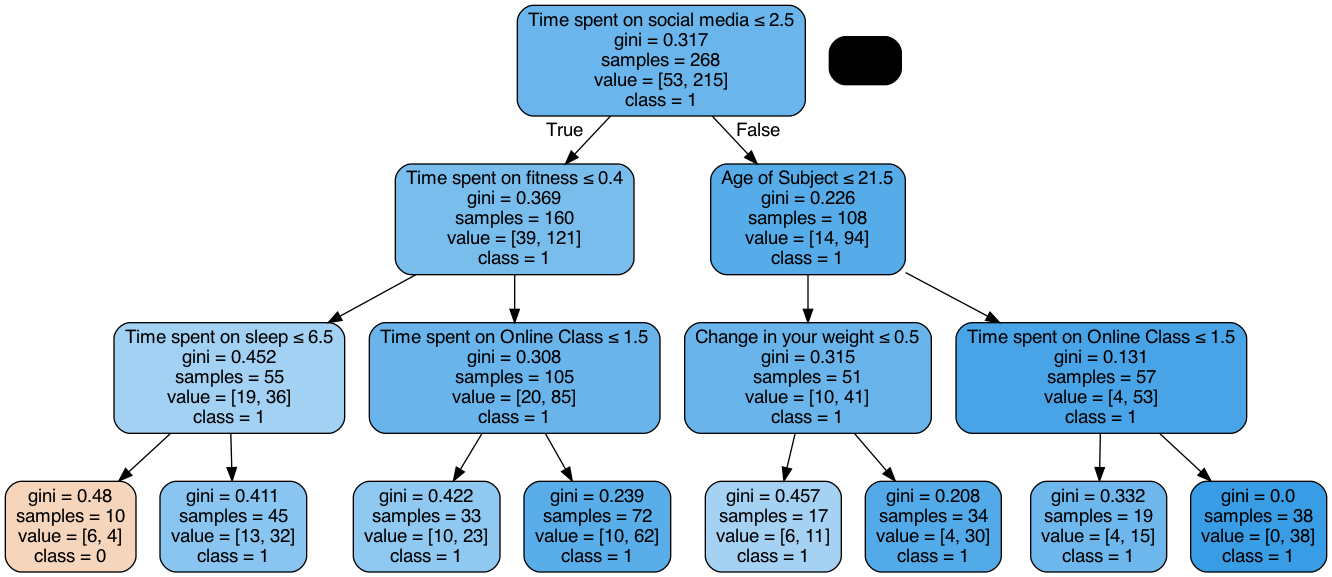

In [52]:
Image(graph.create_png())

In [53]:
y_pred = model.predict(x_test)
print("accuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
print(classification_report(y_test, y_pred))

accuracy: 0.8103448275862069

              precision    recall  f1-score   support

           0       0.33      0.16      0.21        19
           1       0.85      0.94      0.89        97

    accuracy                           0.81       116
   macro avg       0.59      0.55      0.55       116
weighted avg       0.77      0.81      0.78       116



#### Google Search Trends Analysis

DATA WRANGLING

In [54]:
deptext_world = pd.read_csv("./Data/Mental_health/Text_analysis/GT_depression_map_2020.csv")
deptext_world.head()

,Country,depression: (2020)
0,Palau,NaN
1,Micronesia,NaN
2,Lesotho,NaN
3,American Samoa,NaN
4,Cook Islands,NaN


In [55]:
deptext_world = deptext_world.dropna()
print(deptext_world.isnull().sum())

Country               0
depression: (2020)    0
dtype: int64


In [56]:
deptext_world.to_csv("./Data/Mental_health/Text_analysis/cleaned_GT_depression_map_2020.csv")

In [57]:
deptext_world_2019 = pd.read_csv("./Data/Mental_health/Text_analysis/GT_depression_map_2019.csv")
deptext_world_2019.head()

,Country,depression: (2019)
0,Marshall Islands,NaN
1,Lesotho,NaN
2,American Samoa,NaN
3,Eswatini,NaN
4,Philippines,100.0


In [58]:
deptext_world_2019 = deptext_world_2019.dropna()
print(deptext_world_2019.isnull().sum())

Country               0
depression: (2019)    0
dtype: int64


In [59]:
deptext_world_2019.to_csv("./Data/Mental_health/Text_analysis/cleaned_GT_depression_map_2019.csv")

Tableau Plots

#### COVID-19 vs Suicide Rates

#### Trend in the US

Tableau plot

#### Unemployment

Unemployment vs suicide rates across US

In [60]:
suicide_US = pd.read_csv("./Data/Suicide/Geographical/us_statewise_suicide.csv")
suicide_US.head()

,State,suicideRate,suicideNumber
0,Wyoming,29.3,170
1,Alaska,28.5,210
2,Montana,26.2,289
3,New Mexico,24.0,513
4,Colorado,22.1,1312


In [61]:
unemp_rate = []
suicide_rate = []
common_states = []

states = suicide_US['State']

for s in states:
    if(s in unemployment_US['State'].values):
        unemp_rate.append(unemployment_US[unemployment_US['State']==s]['unemploymentRate'].item())
        suicide_rate.append(suicide_US[suicide_US['State']==s]['suicideRate'].item())
        common_states.append(s)

unemp_suicide_dict = {'State':common_states,
                   'Unemployment rate':unemp_rate,
                   'Suicide rate': suicide_rate}

unemp_suicide = pd.DataFrame.from_dict(unemp_suicide_dict)
unemp_suicide.head()

,State,Unemployment rate,Suicide rate
0,Wyoming,NaN,29.3
1,Alaska,0.036,28.5
2,Montana,0.038,26.2
3,New Mexico,0.037,24.0
4,Colorado,0.039,22.1


In [62]:
print(unemp_suicide.isnull().sum())

State                0
Unemployment rate    2
Suicide rate         0
dtype: int64


In [63]:
unemp_suicide = unemp_suicide.dropna()
print(unemp_suicide.isnull().sum())

State                0
Unemployment rate    0
Suicide rate         0
dtype: int64


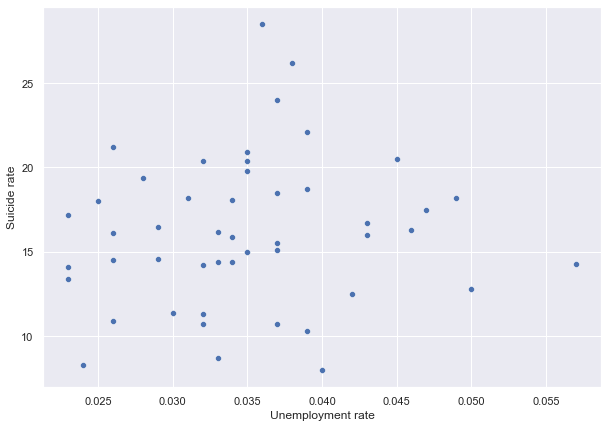

In [64]:
ax = sns.scatterplot(x=unemp_suicide['Unemployment rate'],y=unemp_suicide['Suicide rate'])
plt.xlabel('Unemployment rate')
plt.ylabel('Suicide rate')
ax.figure.savefig("./Figures/MINE/unemp_suicide.png")

In [65]:
r,p = scipy.stats.pearsonr(unemp_suicide['Unemployment rate'], unemp_suicide['Suicide rate'])
print(r,p)

0.10574623728646348 0.4744058480353834


Positive weak correlation (since r value is between 0 and 0.3) and it is statistically insignificant (p value > 0.05)

#### Google Search Trends Analysis

Tableau plots

#### COVID-19 vs Substance Abuse

#### Trend in the US

Tableau plot

#### Unemployment

Unemployment vs drug overdose

In [66]:
drugs_US = pd.read_csv("./Data/Substance_abuse/Geographical/us_statewise_drug_overdose.csv")
drugs_US.head()

,Location,Overdose Deaths,All Deaths,Overdose Deaths as a Percent of All Deaths
0,Alabama,"1,009","63,362",0.016
1,Alaska,146,"5,008",0.029
2,Arizona,"2,660","77,089",0.035
3,Arkansas,515,"37,820",0.014
4,California,"9,538","320,753",0.030


In [67]:
unemp_rate = []
drugs_rate = []
common_states = []

states = drugs_US['Location']

for s in states:
    if(s in unemployment_US['State'].values):
        unemp_rate.append(unemployment_US[unemployment_US['State']==s]['unemploymentRate'].item())
        drugs_rate.append(drugs_US[drugs_US['Location']==s]['Overdose Deaths as a Percent of All Deaths'].item())
        common_states.append(s)

unemp_drugs_dict = {'State':common_states,
                   'Unemployment rate':unemp_rate,
                   'Drug Overdose rate': suicide_rate}

unemp_drugs = pd.DataFrame.from_dict(unemp_drugs_dict)
unemp_drugs.head()

,State,Unemployment rate,Drug Overdose rate
0,Alabama,0.046,29.3
1,Alaska,0.036,28.5
2,Arizona,0.039,26.2
3,Arkansas,0.025,24.0
4,California,0.037,22.1


In [68]:
print(unemp_drugs.isnull().sum())

State                 0
Unemployment rate     2
Drug Overdose rate    0
dtype: int64


In [69]:
unemp_drugs = unemp_drugs.dropna()
print(unemp_drugs.isnull().sum())

State                 0
Unemployment rate     0
Drug Overdose rate    0
dtype: int64


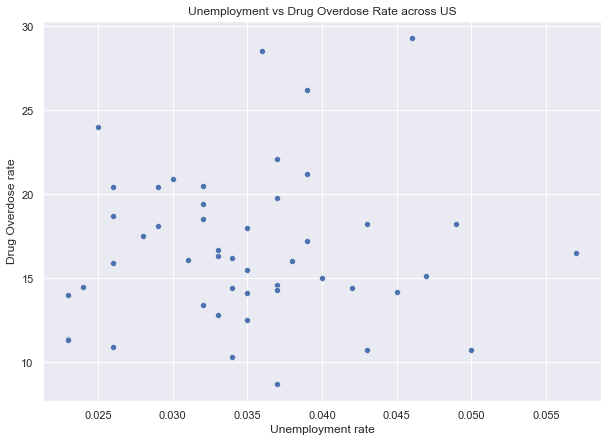

In [70]:
ax = sns.scatterplot(x=unemp_drugs['Unemployment rate'],y=unemp_drugs['Drug Overdose rate'])
plt.title('Unemployment vs Drug Overdose Rate across US')
plt.xlabel('Unemployment rate')
plt.ylabel('Drug Overdose rate')
ax.figure.savefig("./Figures/unemp_drugs.png")

In [71]:
r,p = scipy.stats.pearsonr(unemp_drugs['Unemployment rate'], unemp_drugs['Drug Overdose rate'])
print(r,p)

0.0547797085315372 0.7115325107908888


Positive weak correlation (since r value is between 0 and 0.3) and it is statistically insignificant (p value > 0.05)

Drug overdose vs suicide rate

In [72]:
suicide_rate = []
drugs_rate = []
common_states = []

states = drugs_US['Location']

for s in states:
    if(s in suicide_US['State'].values):
        suicide_rate.append(suicide_US[suicide_US['State']==s]['suicideRate'].item())
        drugs_rate.append(drugs_US[drugs_US['Location']==s]['Overdose Deaths as a Percent of All Deaths'].item())
        common_states.append(s)

suicide_drugs_dict = {'State':common_states,
                   'Suicide rate':suicide_rate,
                   'Drug Overdose rate': suicide_rate}

suicide_drugs = pd.DataFrame.from_dict(suicide_drugs_dict)
suicide_drugs.head()

,State,Suicide rate,Drug Overdose rate
0,Alabama,16.3,16.3
1,Alaska,28.5,28.5
2,Arizona,18.7,18.7
3,Arkansas,18.0,18.0
4,California,10.7,10.7


In [73]:
print(suicide_drugs.isnull().sum())

State                 0
Suicide rate          0
Drug Overdose rate    0
dtype: int64


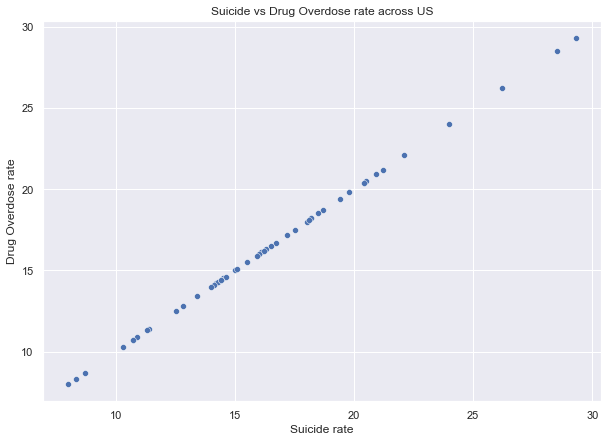

In [74]:
ax = sns.scatterplot(x=suicide_drugs['Suicide rate'],y=suicide_drugs['Drug Overdose rate'])
plt.title('Suicide vs Drug Overdose rate across US')
plt.xlabel('Suicide rate')
plt.ylabel('Drug Overdose rate')
ax.figure.savefig("./Figures/suicide_drugs.png")

In [75]:
r,p = scipy.stats.pearsonr(suicide_drugs['Suicide rate'], suicide_drugs['Drug Overdose rate'])
print(r,p)

0.9999999999999998 0.0


Positive Strong correlation (since r value is between 0.7 and 1.0) and it is statistically significant (p value < 0.05)

#### Google Search Trends Analysis

Tableau plots

#### Statistical Analysis - Wilcoxon test

Depression rates before and during covid

In [76]:
wil = [stats.ranksums(comp_depr['Before covid rate'],comp_depr['During covid rate'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,-5.771771,7.844266e-09


p-value < 0.05. Hence, significant difference.

Depression text search before and during covid

In [77]:
wil = [stats.ranksums(deptext_world_2019['depression: (2019)'],deptext_world['depression: (2020)'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,-0.495984,0.619906


No significant difference but 2020 is greater since test_statistic is negative

Suicide rate vs Drug overdose during the pandemic

In [78]:
wil = [stats.ranksums(suicide_drugs['Suicide rate'],suicide_drugs['Drug Overdose rate'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,0.0,1.0


p>0.05. Hence, no significant difference.

Depression rates between males and females before and during pandemic

In [79]:
gender_before = pd.read_csv("./Data/Mental_health/Gender/prevalence-of-depression-males-vs-females_beforeCOVID.csv")
gender_before.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,NaN
2,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,NaN
3,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,NaN
4,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,NaN


In [80]:
gender_before.drop('Code', axis=1, inplace=True)
gender_before.drop('Population (historical estimates)', axis=1, inplace=True)
gender_before.drop('Continent', axis=1, inplace=True)

In [81]:
gender_before.head()

,Entity,Year,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1990,4.291054,5.859656
2,Afghanistan,1991,4.293268,5.853078
3,Afghanistan,1992,4.298265,5.850020
4,Afghanistan,1993,4.303087,5.844987


In [82]:
print(gender_before.isnull().sum())

Entity                                                                                   0
Year                                                                                     0
Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)      49405
Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)    49405
dtype: int64


In [83]:
gender_before = gender_before.dropna()
print(gender_before.isnull().sum())

Entity                                                                               0
Year                                                                                 0
Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)      0
Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)    0
dtype: int64


In [84]:
gender_before.head()

,Entity,Year,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)
1,Afghanistan,1990,4.291054,5.859656
2,Afghanistan,1991,4.293268,5.853078
3,Afghanistan,1992,4.298265,5.850020
4,Afghanistan,1993,4.303087,5.844987
5,Afghanistan,1994,4.306053,5.843623


In [85]:
male = gender_before.groupby('Entity', as_index=False)['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].mean()

In [86]:
female = gender_before.groupby('Entity', as_index=False)['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].mean()

In [87]:
gender_before_covid = pd.merge(left=male, right=female, left_on='Entity', right_on='Entity')
gender_before_covid.head()

,Entity,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)
0,Afghanistan,4.341899,5.841463
1,Africa,3.763734,5.476025
2,African Region,3.836878,5.500272
3,African Union,3.763734,5.476025
4,Albania,1.752930,3.388266


Male vs Female before pandemic

In [88]:
wil = [stats.ranksums(gender_before_covid['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'],
                      gender_before_covid['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,-15.44078,8.704091e-54


Significant difference - Females more depressed

Male vs Female during pandemic in US

In [89]:
gender_2020 = pd.read_csv("./Data/Mental_health/Gender/US_depression_2020.csv")
gender_2020.head()

,Location,All Adults,Male,Female
0,Alabama,0.303,0.252,0.348
1,Alaska,0.315,0.305,0.326
2,Arizona,0.364,0.317,0.409
3,Arkansas,0.380,0.344,0.413
4,California,0.374,0.323,0.425


In [90]:
wil = [stats.ranksums(gender_2020['Male'], gender_2020['Female'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,-7.612955,2.678999e-14


Significant difference - Females more depressed

In [91]:
gender_2021 = pd.read_csv("./Data/Mental_health/Gender/US_depression_2021.csv")
gender_2021.head()

,Location,All Adults,Male,Female
0,Alabama,0.401,0.352,0.445
1,Alaska,0.413,0.359,0.465
2,Arizona,0.417,0.398,0.435
3,Arkansas,0.434,0.399,0.468
4,California,0.421,0.399,0.443


In [92]:
wil = [stats.ranksums(gender_2021['Male'], gender_2021['Female'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,-7.067499,1.577509e-12


Significant difference - Females more depressed

In [93]:
wil = [stats.ranksums(gender_2020['Male'], gender_2021['Male'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,-4.962642,6.954051e-07


Significant difference - Males more depressed in 2021

In [94]:
wil = [stats.ranksums(gender_2020['Female'], gender_2021['Female'])]
wil_values=pd.DataFrame(data=wil,columns=["Test_Statistic","p-value"])
wil_values

,Test_Statistic,p-value
0,-3.466822,0.000527


Significant difference - Females more depressed in 2021